## Data Clean

In [ ]:
import pandas as pd
import datetime as dt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ai-project/

/content/drive/MyDrive/Colab Notebooks/ai-project


In [ ]:
crime = pd.read_csv('./NYPD_Complaint_Data_Historic.csv',
                    usecols=['CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'ADDR_PCT_CD',
                             'KY_CD', 'OFNS_DESC', 'LAW_CAT_CD',
                             'BORO_NM', 'PREM_TYP_DESC', 'Lat_Lon'])
crime

,CMPLNT_FR_DT,CMPLNT_FR_TM,KY_CD,OFNS_DESC,LAW_CAT_CD,BORO_NM,ADDR_PCT_CD,PREM_TYP_DESC,Lat_Lon
0,12/31/2015,23:45:00,113,FORGERY,FELONY,BRONX,44.0,BAR/NIGHT CLUB,"(40.828848333, -73.916661142)"
1,12/31/2015,23:36:00,101,MURDER & NON-NEGL. MANSLAUGHTER,FELONY,QUEENS,103.0,NaN,"(40.697338138, -73.784556739)"
2,12/31/2015,23:30:00,117,DANGEROUS DRUGS,FELONY,MANHATTAN,28.0,OTHER,"(40.802606608, -73.945051911)"
3,12/31/2015,23:30:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,QUEENS,105.0,RESIDENCE-HOUSE,"(40.654549444, -73.726338791)"
4,12/31/2015,23:25:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,MANHATTAN,13.0,OTHER,"(40.7380024, -73.98789129)"
...,...,...,...,...,...,...,...,...,...
1048570,11/1/2013,20:30:00,341,PETIT LARCENY,MISDEMEANOR,BRONX,40.0,RESIDENCE - APT. HOUSE,"(40.806931888, -73.920766811)"
1048571,11/1/2013,20:28:00,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BROOKLYN,75.0,GROCERY/BODEGA,"(40.660901484, -73.895226891)"
1048572,11/1/2013,20:25:00,121,CRIMINAL MISCHIEF & RELATED OF,FELONY,MANHATTAN,1.0,FAST FOOD,"(40.723908621, -74.004680695)"
1048573,11/1/2013,20:25:00,235,DANGEROUS DRUGS,MISDEMEANOR,BRONX,52.0,STREET,"(40.877554428, -73.872939471)"


In [ ]:
crime.columns = ['date', 'time', 'precinct', 'class_code', 'description', 'level'
                    , 'borough', 'premises', 'geo']

In [ ]:
crime.shape

(1048575, 9)

In [ ]:
crime.dtypes

date            object
time            object
precinct         int64
class_code      object
description     object
level           object
borough        float64
premises        object
geo             object
dtype: object

In [ ]:
crime.date = pd.to_datetime(crime.date, errors='coerce')

In [ ]:
crime.time = pd.to_datetime(crime.time, errors='coerce').dt.hour
crime.isna().sum()
crime.dropna(inplace=True)
# Change time to int
crime.time = crime.time.astype('int64')
# Remove some
crime = crime[(crime.date > '11-01-2013') & (crime.date < '01-01-2019')]

In [ ]:
# Transform precinct to int
crime['precinct'] = crime.precinct.astype('int64')
# Transform geo column to float
crime['geoloc'] = crime['geo'].str.replace('(','').str.replace(')', '').str.split(', ')
crime['latitude'] = crime['geoloc'].apply(lambda x: x[0]).astype('float64')
crime['longitude'] = crime['geoloc'].apply(lambda x: x[1]).astype('float64')
# Drop some
crime.drop(labels=['geo', 'geoloc'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

## Config the algo

In [ ]:
crime

,date,time,precinct,class_code,description,level,borough,premises,latitude,longitude
0,2015-12-31,23,113,FORGERY,FELONY,BRONX,44.0,BAR/NIGHT CLUB,40.828848,-73.916661
2,2015-12-31,23,117,DANGEROUS DRUGS,FELONY,MANHATTAN,28.0,OTHER,40.802607,-73.945052
3,2015-12-31,23,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,QUEENS,105.0,RESIDENCE-HOUSE,40.654549,-73.726339
4,2015-12-31,23,344,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,MANHATTAN,13.0,OTHER,40.738002,-73.987891
5,2015-12-31,23,106,FELONY ASSAULT,FELONY,BROOKLYN,71.0,DRUG STORE,40.665023,-73.957111
...,...,...,...,...,...,...,...,...,...,...
1048041,2013-11-02,0,578,HARRASSMENT 2,VIOLATION,BRONX,42.0,STREET,40.832470,-73.904244
1048042,2013-11-02,0,361,OFF. AGNST PUB ORD SENSBLTY &,MISDEMEANOR,BROOKLYN,73.0,RESIDENCE - APT. HOUSE,40.662206,-73.905941
1048043,2013-11-02,0,236,DANGEROUS WEAPONS,MISDEMEANOR,BRONX,47.0,LIQUOR STORE,40.893817,-73.858835
1048044,2013-11-02,0,109,GRAND LARCENY,FELONY,MANHATTAN,13.0,STREET,40.746028,-73.992394


In [ ]:
pip install plotting

In [ ]:
# le classique imports
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tqdm import tqdm
from datetime import datetime, timedelta
import matplotlib as mpl
import matplotlib.animation
from sklearn.metrics import mean_absolute_error
import plotting

In [ ]:
def arima_plot(predicted, observed, save=False):
    # ARIMA plot function
    fig, ax = plt.subplots(figsize=(6, 4))
    # ax = default_plot(ax, ['left', 'bottom'])
    ax = default_plot(ax, ['left', 'bottom'])
    plt.xticks([6, 18], ['2017', '2018'])
    plt.vlines(12, 6500, 9500, ls='dashed',color='grey')
    plt.ylim(6500, 9500)
    plt.xlim(0, 24)
    plt.ylabel('Crimes per month')
    plt.plot(test, lw=3, color='k', label='Observed')
    plt.plot(predictions, color='r', lw=3, label='Predicted')
    plt.tight_layout()
    plt.legend(frameon=False, bbox_to_anchor=(1, 1.1))
    
    if save:
        plt.savefig('figures/nyc_ARIMA.png')
      

def choropleth(basemap, save=False):
    
    # plot the map
    ax = geoplot.choropleth(basemap, hue='rates', figsize=(12, 12), lw= 1, edgecolor='k', alpha=1, cmap='plasma', projection=gcrs.AlbersEqualArea())
    
    # save figure if requested
    if save:
        plt.savefig('figures/arimap.png', dpi=300)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    
    # calculate mean absolute error in percentage of total
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def into_timeseries(df):
    
    # transform crime dataframe ii timeseries
    df = df.groupby('date').agg(count=('precinct','count')).reset_index()
    df = df.set_index('date')
    df.index = pd.to_datetime(df.index)
    return df

def get_stationarity(timeseries, window=12):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=window).mean()
    rolling_std = timeseries.rolling(window=window).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    decomposition = seasonal_decompose(timeseries, model='additive')
    decomposition.plot();
    
    # Dickey–Fuller test:
    result = adfuller(timeseries['count'])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

def auto_correlation(timeseries):
    plot_pacf(timeseries.diff().dropna(), lags=20, title='Partial Autocorrelation')
    plot_acf(timeseries.diff().dropna(), title="1st Order Differencing")
        

def micro_arima(precinct):

    precinct_data = crime_subset.loc[(crime_subset.precinct == precinct)]

    precinct_ts = into_timeseries(precinct_data)
    precinct_ts = precinct_ts.resample('MS').sum()

    train = precinct_ts['2013-01-01':'2014-12-31'].values
    test = precinct_ts['2015-01-01':].values

    history = [x for x in train]
    predictions = []
    error = []

    for t in tqdm(range(len(test))):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions += [yhat]
        obs = test[t]
        history += [obs]
        error += [abs(yhat - obs)]

    mae = mean_absolute_error(test, predictions)
    print('Test MAE: ' + str(mae) + ' (' + str(precinct) + ')')

    data = {'precinct': [precinct]*len(test), 
            'prediction': [x[0] for x in predictions], 
            'observed': [x[0] for x in test], 
            'date':precinct_ts['2017-01-01':].index,
            'mae':[x[0] for x in error]}

    output = pd.DataFrame(data)
    
    return output

In [ ]:
violent = ['FELONY ASSAULT', 'ROBBERY', 'RAPE']
propert = ['BURGLARY', 'ARSON', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE']
crime_filter = violent + propert
crime_filter = ['FELONY']
crime_subset = crime[crime.description.isin(crime_filter)]
# crime_subset = crime

In [ ]:
crime_subset

,date,time,precinct,class_code,description,level,borough,premises,latitude,longitude
0,2015-12-31,23,113,FORGERY,FELONY,BRONX,44.0,BAR/NIGHT CLUB,40.828848,-73.916661
2,2015-12-31,23,117,DANGEROUS DRUGS,FELONY,MANHATTAN,28.0,OTHER,40.802607,-73.945052
5,2015-12-31,23,106,FELONY ASSAULT,FELONY,BROOKLYN,71.0,DRUG STORE,40.665023,-73.957111
7,2015-12-31,23,118,DANGEROUS WEAPONS,FELONY,BRONX,46.0,STREET,40.845707,-73.910398
12,2015-12-31,23,109,GRAND LARCENY,FELONY,MANHATTAN,14.0,STREET,40.757916,-73.989299
...,...,...,...,...,...,...,...,...,...,...
1048031,2013-11-02,0,118,DANGEROUS WEAPONS,FELONY,QUEENS,107.0,STREET,40.731996,-73.816276
1048033,2013-11-02,0,113,FORGERY,FELONY,BROOKLYN,68.0,STREET,40.632642,-74.012536
1048034,2013-11-02,0,121,CRIMINAL MISCHIEF & RELATED OF,FELONY,MANHATTAN,24.0,STREET,40.799170,-73.964786
1048035,2013-11-02,0,107,BURGLARY,FELONY,QUEENS,101.0,RESIDENCE - APT. HOUSE,40.595149,-73.764517


In [ ]:
crime_ts = into_timeseries(crime_subset)
crime_ts

,count
date,
2013-11-02,454
2013-11-03,322
2013-11-04,340
2013-11-05,380
2013-11-06,384
...,...
2015-12-27,316
2015-12-28,303
2015-12-29,300


In [ ]:
# Cannot run it by months
monthly = crime_ts.resample('MS').sum()
monthly = crime_ts

ADF Statistic: -1.386373779627024
p-value: 0.5887909862058307
Critical Values:
	1%: -3.4388933482333464
	5%: -2.8653106782623574
	10%: -2.5687778874376086


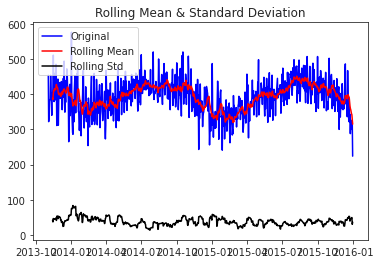

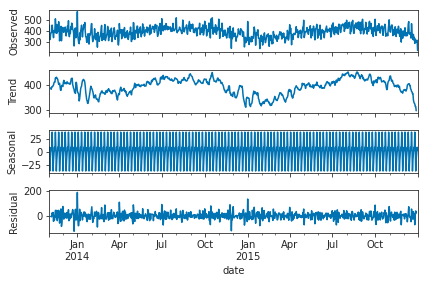

In [ ]:
get_stationarity(crime_ts)

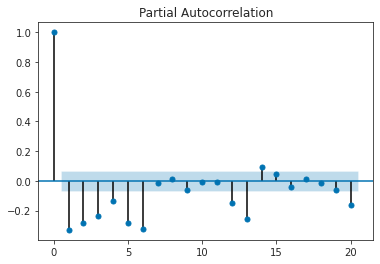

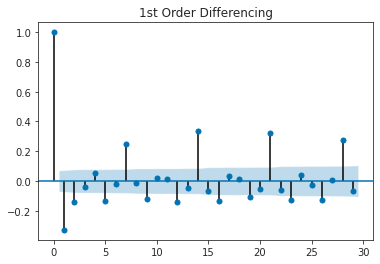

In [ ]:
auto_correlation(crime_ts)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


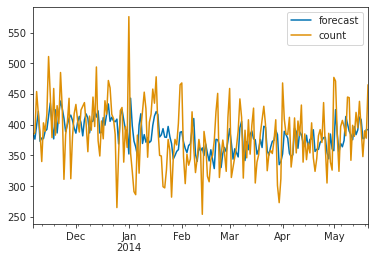

In [ ]:
model = ARIMA(crime_ts, order=(8,1,1))
results = model.fit(disp=0)
results.plot_predict(4,200);

In [ ]:
# Split into train and test
train = monthly['2013-01-01':'2014-12-31'].values
test = monthly['2015-01-01':].values

# train = precinct_ts['2013-01-01':'2014-12-31'].values
# test = precinct_ts['2015-01-01':].values

# create history to keep updating the model
history = [x for x in train]

# save predictions
predictions = []

for t in tqdm(range(len(test))):
    model = ARIMA(history, order=(8,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

100%|██████████| 365/365 [13:55<00:00,  2.29s/it]


In [ ]:
error = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % error)

Test MAE: 29.028


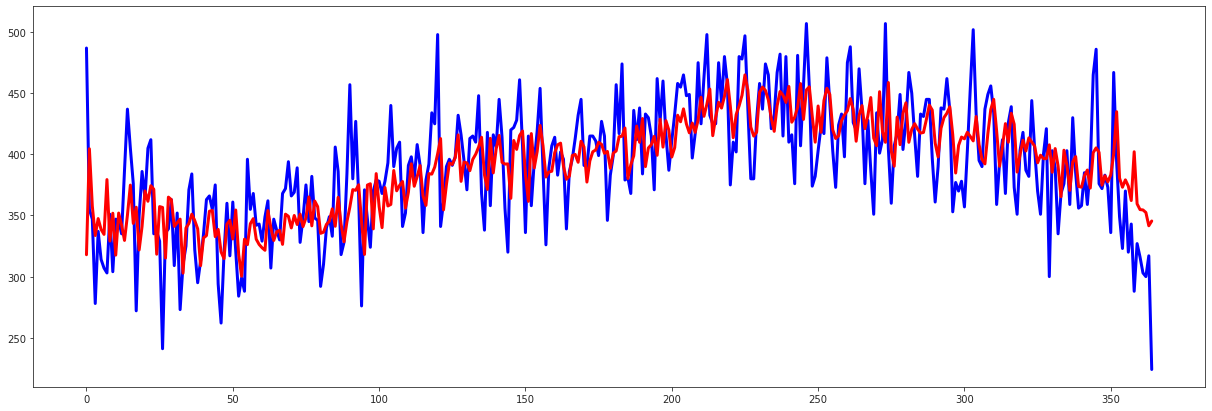

In [ ]:
# arima_plot(predictions, test, save=False)

plt.figure(figsize=(21, 7))

plt.plot(test, lw=3, color='b', label='Observed')
plt.plot(predictions, color='r', lw=3, label='Predicted')
plt.show()